In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium import plugins
import ipywidgets 
from branca.element import Figure

In [3]:
df = pd.read_csv('realtor-data.csv')
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
923154,for_sale,445000.0,1.0,2.0,0.99,"1008 King St, Chappaqua, NY, 10514",1008 King St,Chappaqua,New York,10514.0,1052.0,2011-05-09
923155,for_sale,418000.0,4.0,2.0,0.40,"3 Elmwood Dr, Monroe, NY, 10950",3 Elmwood Dr,Monroe,New York,10950.0,1650.0,2015-07-21
923156,for_sale,469000.0,4.0,2.0,0.18,"13 N Conger Ave, Congers, NY, 10920",13 N Conger Ave,Congers,New York,10920.0,2123.0,NaN
923157,for_sale,825000.0,5.0,5.0,0.79,"7 Miller Rd, Valley Cottage, NY, 10989",7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,2010-06-02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [5]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.230880e+05,791456.000000,807967.000000,649536.000000,922954.000000,6.253160e+05
mean,8.841225e+05,3.330352,2.488164,17.075888,6590.061523,2.141644e+03
std,2.623745e+06,2.070402,1.940057,962.322866,3818.208203,3.035327e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.690000e+05,2.000000,1.000000,0.110000,2919.000000,1.130000e+03
50%,4.750000e+05,3.000000,2.000000,0.290000,7004.000000,1.651000e+03
75%,8.399000e+05,4.000000,3.000000,1.150000,10001.000000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06


In [6]:
df.drop(['acre_lot','zip_code', 'sold_date' ], axis=1, inplace=True)

In [7]:
df2 =df.fillna(0)
df2

,status,price,bed,bath,full_address,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,1800.0
4,for_sale,65000.0,6.0,2.0,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,0.0
...,...,...,...,...,...,...,...,...,...
923154,for_sale,445000.0,1.0,2.0,"1008 King St, Chappaqua, NY, 10514",1008 King St,Chappaqua,New York,1052.0
923155,for_sale,418000.0,4.0,2.0,"3 Elmwood Dr, Monroe, NY, 10950",3 Elmwood Dr,Monroe,New York,1650.0
923156,for_sale,469000.0,4.0,2.0,"13 N Conger Ave, Congers, NY, 10920",13 N Conger Ave,Congers,New York,2123.0
923157,for_sale,825000.0,5.0,5.0,"7 Miller Rd, Valley Cottage, NY, 10989",7 Miller Rd,Valley Cottage,New York,3775.0


In [8]:
df2['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware'], dtype=object)

In [9]:
df3=df2.loc[(df2['state'] != 'Puerto Rico') & (df2['state'] != 'Virgin Islands') & (df2['house_size'] != 0.0) & (df2['bed'] != 0.0) & (df2['bath'] != 0.0)  & (df2['price'] < 1000000.0)  & (df2['house_size'] < 2000.0) & (df2['bath'] < 6.0) & (df2['bed'] < 6.0)]
df3

,status,price,bed,bath,full_address,street,city,state,house_size
24231,for_sale,180000.0,2.0,1.0,"23 Moore St, Agawam, MA, 01001",23 Moore St,Agawam,Massachusetts,676.0
24233,for_sale,169900.0,2.0,2.0,"420 Main St Apt 42, Agawam, MA, 01001",420 Main St Apt 42,Agawam,Massachusetts,892.0
24234,for_sale,242000.0,2.0,2.0,"2A Mansion Woods Dr Unit 2A, Agawam, MA, 01001",2A Mansion Woods Dr Unit 2A,Agawam,Massachusetts,1428.0
24235,for_sale,299950.0,2.0,2.0,"19 Castle Hill Rd Unit C, Agawam, MA, 01001",19 Castle Hill Rd Unit C,Agawam,Massachusetts,1659.0
24236,for_sale,239900.0,3.0,1.0,"270 South St, Agawam, MA, 01001",270 South St,Agawam,Massachusetts,1196.0
...,...,...,...,...,...,...,...,...,...
923137,for_sale,289000.0,2.0,1.0,"281 Garth Rd Apt C6K, Scarsdale, NY, 10583",281 Garth Rd Apt C6K,Scarsdale,New York,1100.0
923140,for_sale,629000.0,4.0,2.0,"9 Tower Hill Dr, Port Chester, NY, 10573",9 Tower Hill Dr,Port Chester,New York,1554.0
923149,for_sale,355000.0,3.0,3.0,"3 Cullen Ave, New Windsor, NY, 12553",3 Cullen Ave,New Windsor,New York,1680.0
923154,for_sale,445000.0,1.0,2.0,"1008 King St, Chappaqua, NY, 10514",1008 King St,Chappaqua,New York,1052.0


In [11]:
df3.value_counts('state')

state
Massachusetts    73598
New Jersey       61544
New York         54945
Connecticut      48495
New Hampshire    17643
Rhode Island     17285
Maine            14314
Vermont          13633
Pennsylvania     10734
Delaware          1121
West Virginia        3
Wyoming              3
dtype: int64

In [14]:
mass=[42.3788774, 72.032366, 73598]
nj=[40.0757384,-74.4041622, 61544]
ny=[40.7127281,-74.0060152,54945]
cnct=[41.6500201,-72.7342163,48495]
nh=[43.4849133,-71.6553992,17643]
ri=[41.7962409,-71.5992372,17285]
maine=[45.709097,-68.8590201,14314]
vermont=[44.5990718,-72.5002608,13633]
pnsyv=[40.9699889,-77.7278831,10734]
dlw=[38.6920451,-75.4013315, 1121]
wv=[38.4758406,-80.8408415,3]
wy=[43.1700264,107.568534,3]

states2=[mass,nj,ny,cnct,nh,ri,maine,vermont,pnsyv,dlw,wv,wy]
liststates2=folium.Map(location=[41.411835, -75.665245],zoomstart=15)
plugins.HeatMap(states2).add_to(liststates2)
liststates2

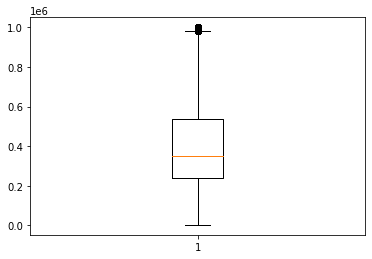

In [16]:
figD = plt.figure()
plt.boxplot(df3['price'])
plt.show()

(array([11808., 46110., 72021., 59365., 38347., 28050., 22011., 15378.,
        11582.,  8646.]),
 array([  2475. , 102227.4, 201979.8, 301732.2, 401484.6, 501237. ,
        600989.4, 700741.8, 800494.2, 900246.6, 999999. ]),
 <BarContainer object of 10 artists>)

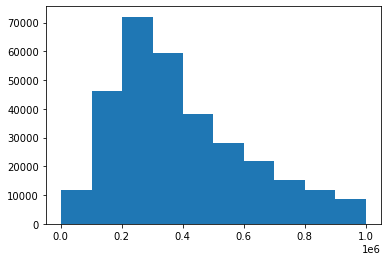

In [17]:
plt.hist(df3['price'])

Text(0, 0.5, 'Y axis')

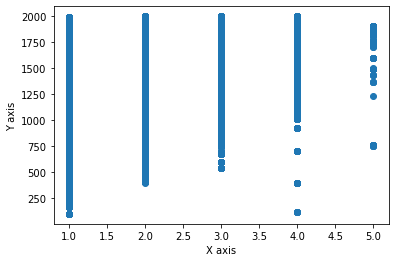

In [21]:
xv = df3['bath']
yv = df3['house_size']
plt.scatter(xv,yv)
plt.xlabel('Number of baths')
plt.ylabel('House Size')

<AxesSubplot:>

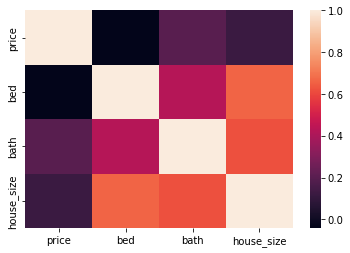

In [24]:
sns.heatmap(df3.corr())

In [27]:
sns.lmplot(x ='Bath', y ='Bed', df3 = data, hue="ItemType")

SyntaxError: invalid syntax (1835151418.py, line 1)

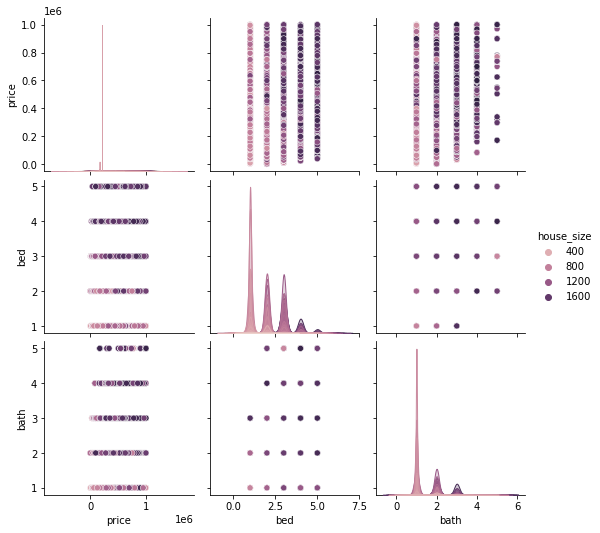

In [28]:
sns.pairplot(df3,hue='house_size')

In [13]:
df3.to_csv(r'//Users/alanromero/IH/Proyectos/Proyecto_3/Real_estate-USA')